In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.8.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shurt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal' ,'Shirt', 'Sneaker',
               'Bag','Ankle Boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

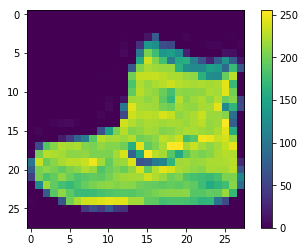

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images /255.0
test_images = test_images /255.0

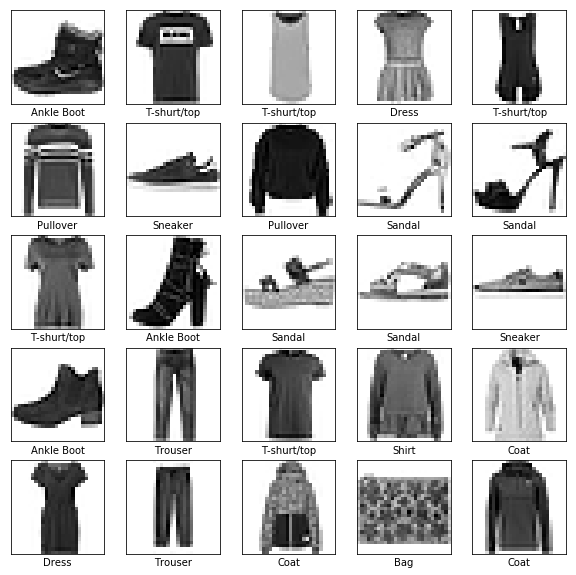

In [11]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()              

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 108us/step - loss: 0.4949 - acc: 0.8266
Epoch 2/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.3728 - acc: 0.8645
Epoch 3/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.3360 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.3112 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.2921 - acc: 0.8928


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('TEst accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/step
TEst accuracy: 0.8676


In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([1.4375921e-05, 4.7003010e-07, 1.3871159e-05, 5.4086824e-09,
       1.6042133e-05, 1.6066389e-01, 6.3440733e-05, 7.9704262e-02,
       2.0173991e-05, 7.5950348e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], train_labels[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predictions_label = np.argmax(predictions_array)
    if predictions_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predictions_label],
                                      100*np.max(predictions_array),
                                      class_names[true_label]),
                                      color = color)
    
def plot_value_array(i , predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

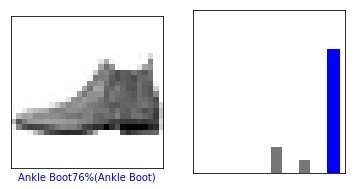

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

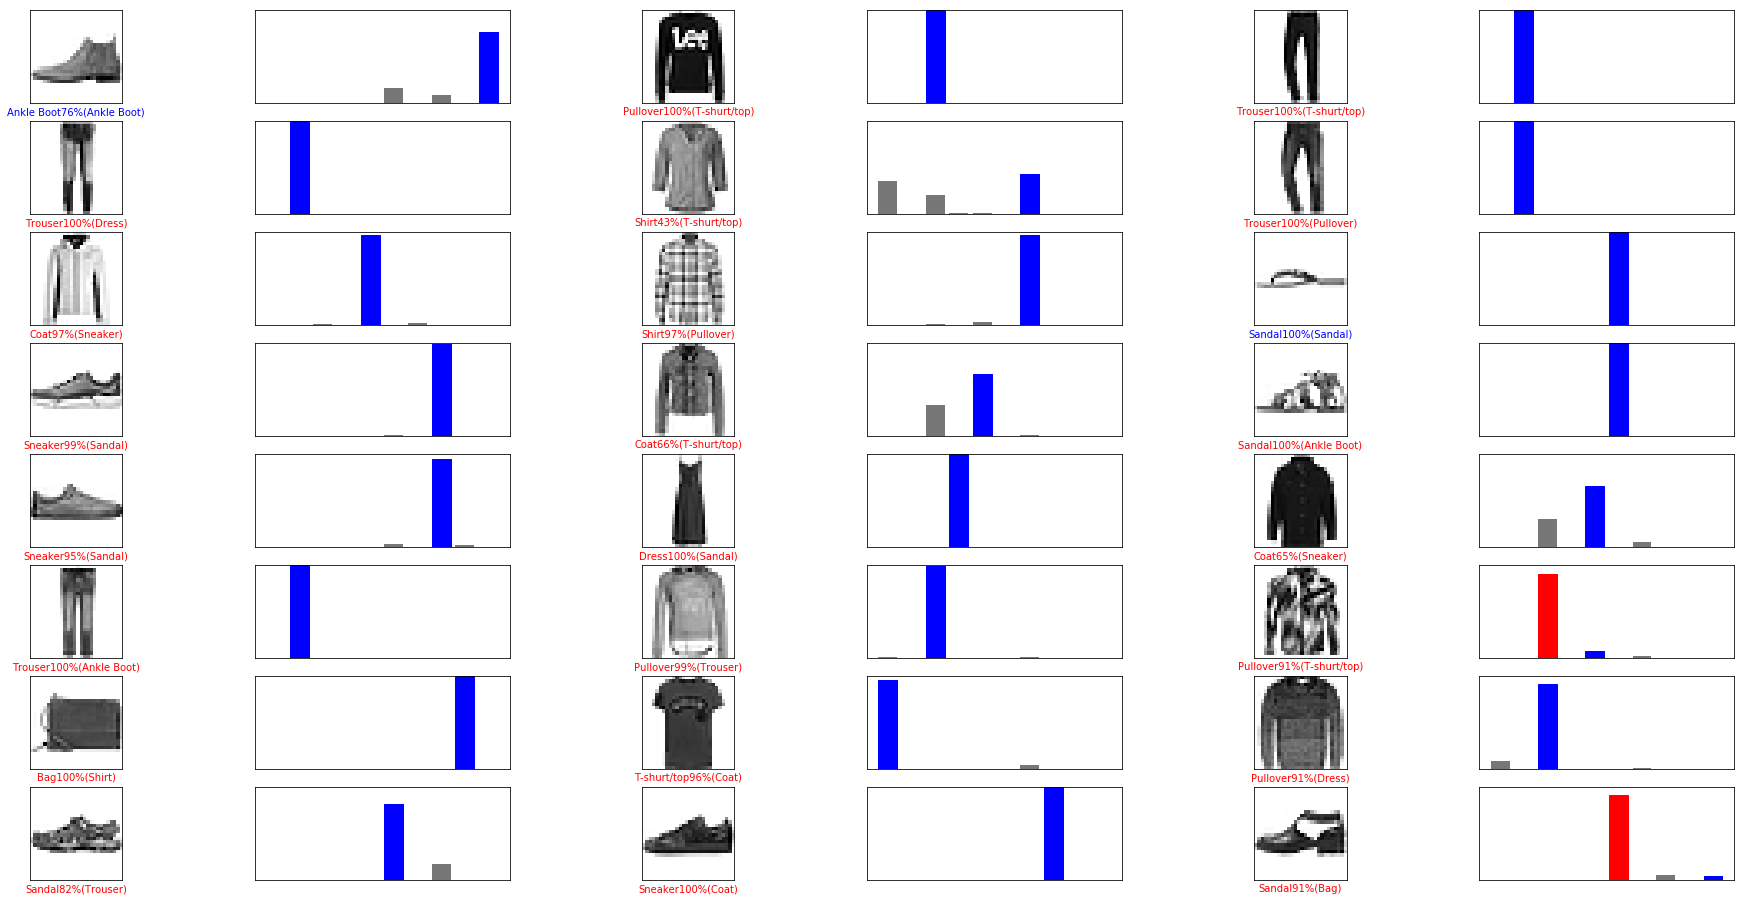

In [28]:
num_rows = 8
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_rows, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i +2)
    plot_value_array(i, predictions, test_labels)
plt.show()